In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline
# For most of the statistical analysis we use Scientific Python - scipy
import scipy.stats as stats

# one sample t-test - ttest_1samp           one variable, hypothetical values
# independent sample t-test - ttest_ind     two variables
# paired sample t-test - ttest_rel          two variables
# ANOVA or F-test - f_oneway                two or multiple variables(categorical & continuous)
# Chsiqure test - chi2_contingency          multiple variables        (categorical & categorical)  
# Correlaiton test - pearsonr                                         (continuous & countinuous)

# BUSINESS PROBLEM-1

In [4]:
#importing the csv file :- 
loandata = pd.read_csv("C:/Users/dharmendra.sing1/Basic Statistics - Hypothesis Testing/LoansData.csv")


In [5]:
# rename the column name :- 
loandata.columns = loandata.columns.str.replace('.','_')
# removing the % symbol from the interest rate:- 
loandata.Interest_Rate = loandata.Interest_Rate.str.replace('%','') 
#removing the months from the loan length column:- 
loandata.Loan_Length = loandata.Loan_Length.str.replace(' months','')

C:\Users\DHARME~1.SIN\AppData\Local\Temp/ipykernel_14888/3929608517.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loandata.columns = loandata.columns.str.replace('.','_')


In [6]:
loandata.head(5)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [7]:
# N/A or missing value treatment:=
loandata.Interest_Rate.fillna(value=round(loandata.Interest_Rate.astype(float).mean(),2),inplace=True)
loandata.FICO_Range.fillna(value='735-739',inplace=True)
loandata.Interest_Rate.fillna(value=round(loandata.Interest_Rate.astype(float).mean(),2),inplace=True)
loandata.Home_Ownership.fillna(value='OTHER',inplace=True)
loandata.loc[loandata['Home_Ownership'] == "NONE",'Home_Ownership']='OTHER'
loandata.fillna(value=0,inplace=True)



# Q1.Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)


Ho: No relationship Ha: Dependent or have relationship

CI: 95%, p-value: 0.05
(continuous countinuous)
Test: Pearson Cofficient

In [8]:
   
# Perform the test :
stats.pearsonr(loandata.Interest_Rate.astype(float), loandata.Amount_Funded_By_Investors)

(0.33746619433675135, 1.2291607608400177e-67)

In [9]:
#    Result...... 
#    intrest rate and loan amount have a very poor relation-ship and 
#    "Less intrest charged for high loan amounts" is not completely true

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate', ylabel='Amount_Funded_By_Investors'>

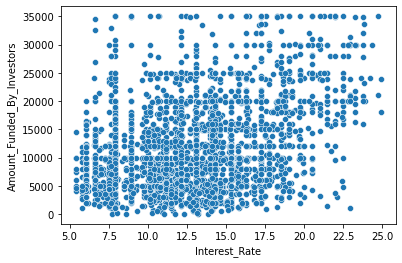

In [10]:
sns.scatterplot( loandata.Interest_Rate.astype(float), loandata.Amount_Funded_By_Investors)

# Q2.Loan length is directly effecting intrest rate.


Ho: Loan length is not directly effecting intrest rate
Ha: Loan length is directly effecting intrest rate

CI: 95%, p-value: 0.05
(categorical countinuous)
Test: ANOVA or F-test

In [11]:
# Loan length converted from string to int 
loandata.Loan_Length=loandata.Loan_Length.astype(int)
loandata.Interest_Rate=loandata.Interest_Rate.astype(float)


In [12]:
loandata.Loan_Length.value_counts()

36    1952
60     548
Name: Loan_Length, dtype: int64

In [13]:
loandata[['Loan_Length','Interest_Rate']]

,Loan_Length,Interest_Rate
0,36,8.90
1,36,12.12
2,60,21.98
3,36,9.99
4,36,11.71
...,...,...
2495,60,16.77
2496,60,14.09
2497,36,13.99
2498,36,12.42


In [14]:
s1=loandata.loc[loandata.Loan_Length == 36,'Interest_Rate']
s2=loandata.loc[loandata.Loan_Length == 60,'Interest_Rate']
stats.f_oneway(s1,s2)

F_onewayResult(statistic=548.0495769785604, pvalue=9.555388366812732e-110)

In [15]:
print('mean for 36 loan length',s1.mean(), '\nmean for 60 loan length',s2.mean())

mean for 36 loan length 12.127146516393552 
mean for 60 loan length 16.40746350364961


# BUSINESS PROBLEM-1
Q3.  Inrest rate varies for different purpose of loans

Ho: Inrest rate is not vary for different purpose of loans

Ha: Inrest rate varies for different purpose of loans

CI: 95%, p-value: 0.05
(categorical countinuous)

Test: ANOVA or F-test

In [16]:
loandata.Loan_Purpose.value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

In [17]:
#mean calculation foe the different catogeries:- 
s1=loandata.pivot_table(index='Loan_Purpose',values='Interest_Rate',aggfunc='mean').reset_index()
s1

,Loan_Purpose,Interest_Rate
0,car,11.113000
1,credit_card,13.050698
2,debt_consolidation,13.586917
3,educational,11.007333
4,home_improvement,11.594276
5,house,13.448000
6,major_purchase,10.797822
7,medical,11.649667
8,moving,13.621034
9,other,13.159552


In [18]:
#creating the list for the different loan purposes
list1=s1.iloc[:,0]


In [19]:
# saperating the intrest rate as per the categories
list1
x=len(list1)
for i in range(x):
    list1[i]=loandata.loc[loandata.Loan_Purpose == list1[i],'Interest_Rate']
     

C:\Users\DHARME~1.SIN\AppData\Local\Temp/ipykernel_14888/3903904104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list1[i]=loandata.loc[loandata.Loan_Purpose == list1[i],'Interest_Rate']


In [20]:
stats.f_oneway(list1[0],list1[1],list1[2],list1[3],list1[4],list1[5],list1[6],list1[7],list1[8],list1[9],list1[10],list1[11],list1[12],list1[13])

F_onewayResult(statistic=7.4825947670544615, pvalue=1.1602506809075995e-14)

# Q4.  There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores


In [21]:
loandata.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [22]:

obs = pd.crosstab( loandata.Home_Ownership ,loandata.FICO_Range )
obs

FICO_Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home_Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,67,79,55,61,...,21,12,15,7,7,6,5,6,0,1
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,1,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,90,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [23]:
stats.chi2_contingency( obs )

(269.7947022863126,
 3.0814483537111913e-15,
 111,
 array([[2.29400e+00, 1.37640e+00, 4.58800e-01, 1.83520e+00, 5.73500e+01,
         6.65260e+01, 7.84548e+01, 7.61608e+01, 7.20316e+01, 6.23968e+01,
         6.42320e+01, 7.01964e+01, 6.01028e+01, 6.14792e+01, 5.13856e+01,
         4.26684e+01, 5.23032e+01, 4.31272e+01, 4.31272e+01, 3.07396e+01,
         2.43164e+01, 2.47752e+01, 2.79868e+01, 2.11048e+01, 2.11048e+01,
         1.65168e+01, 7.79960e+00, 1.00936e+01, 1.28464e+01, 8.71720e+00,
         9.17600e+00, 5.96440e+00, 5.96440e+00, 5.04680e+00, 3.67040e+00,
         2.75280e+00, 4.58800e-01, 4.58800e-01],
        [1.40000e-02, 8.40000e-03, 2.80000e-03, 1.12000e-02, 3.50000e-01,
         4.06000e-01, 4.78800e-01, 4.64800e-01, 4.39600e-01, 3.80800e-01,
         3.92000e-01, 4.28400e-01, 3.66800e-01, 3.75200e-01, 3.13600e-01,
         2.60400e-01, 3.19200e-01, 2.63200e-01, 2.63200e-01, 1.87600e-01,
         1.48400e-01, 1.51200e-01, 1.70800e-01, 1.28800e-01, 1.28800e-01,
         1.0

....Result....
Both the variables are associative 

# BUSINESS PROBLEM - 2


we would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry.

In [24]:
price = pd.read_csv("C:/Users/dharmendra.sing1/Basic Statistics - Hypothesis Testing/Price_Quotes.csv")


Ho: No difference in the average price 

Ha: Difference in the average price

CI: 95%, p-value: 0.05 (categorical countinuous)

Test: ANOVA or F-test

<AxesSubplot:xlabel='Order_Number'>

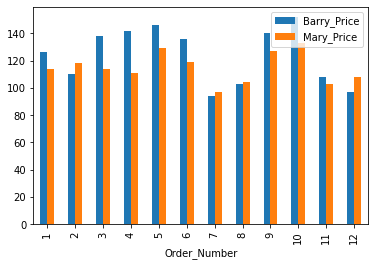

In [25]:
price.set_index("Order_Number").plot(kind="bar")

In [26]:
stats.pearsonr(price.Barry_Price, price.Mary_Price)

(0.8244127830429856, 0.0009709574235546202)

In [27]:
print("Average price of the mary ",price.Mary_Price.mean(),"\nAverage price of the Berry ",price.Barry_Price.mean(),
     "\n Difference of the average price",round(price.Barry_Price.mean()-price.Mary_Price.mean(),2))

Average price of the mary  114.75 
Average price of the Berry  124.33333333333333 
 Difference of the average price 9.58


In [28]:
stats.ttest_ind(price.Barry_Price, price.Mary_Price)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

# BUSINESS PROBLEM-3:


 Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved

In [29]:
treatment = pd.read_csv("C:/Users/dharmendra.sing1/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv")

In [30]:
#changing the column name as per the busines problem 3 data availability
treatment.rename(columns={'VAR4' :'TRFE(%)','VAR5':'CI(%)'},inplace=True)

In [31]:
#checking for the missing values:- 
treatment.isna().sum()

Month                0
Reengineer           0
Employee_Turnover    0
TRFE(%)              0
CI(%)                0
dtype: int64

# checking and visualization the changes in the Employee_Turnover:-

In [32]:

m1=treatment.pivot_table(index='Reengineer',values='Employee_Turnover',aggfunc='mean')
m1.reset_index()

,Reengineer,Employee_Turnover
0,Post,18.689129
1,Prior,11.735692


<AxesSubplot:xlabel='Reengineer'>

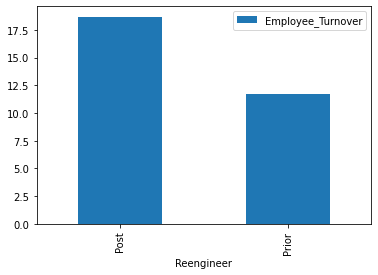

In [33]:
m1.plot(kind='bar')

In [34]:
m2=treatment.loc[treatment.Reengineer=='Prior','Employee_Turnover']
m3=treatment.loc[treatment.Reengineer=='Post','Employee_Turnover']
stats.f_oneway(m2,m3)

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

# checking and visualization the changes in the TRFE(%):-

In [35]:
n1=treatment.pivot_table(index='Reengineer',values='TRFE(%)',aggfunc='mean')
n1

,TRFE(%)
Reengineer,
Post,9.232042
Prior,20.540335


<AxesSubplot:title={'center':'Average change in the TRFE(%)'}, xlabel='Reengineer'>

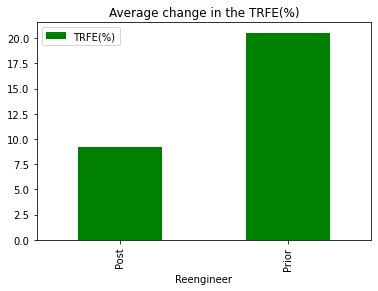

In [36]:
n1.plot(kind='bar',title='Average change in the TRFE(%)',color = 'Green')

In [37]:
n2=treatment.loc[treatment.Reengineer == "Prior","TRFE(%)"]
n3=treatment.loc[treatment.Reengineer == "Post","TRFE(%)"]


stats.f_oneway(n2,n3)

F_onewayResult(statistic=7.747306925230095, pvalue=0.01226508213873439)

# checking and visualization the changes in the CI(%):-

In [38]:
o1=treatment.pivot_table(index='Reengineer',values='CI(%)',aggfunc='mean')
o1

,CI(%)
Reengineer,
Post,23.349719
Prior,53.887906


<AxesSubplot:title={'center':'change in the CI(%) after the reingineering'}, xlabel='Reengineer'>

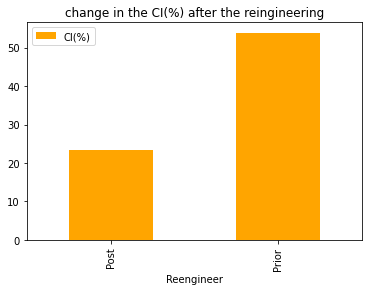

In [39]:
o1.plot(kind='bar',title='change in the CI(%) after the reingineering',color='orange')

In [40]:
o2=treatment.loc[treatment.Reengineer == "Prior","CI(%)"]
o3=treatment.loc[treatment.Reengineer == "Post","CI(%)"]


stats.f_oneway(o2,o3)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

# BUSINESS PROBLEM-4


BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs,and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether thisis, in fact, occurring.

In [41]:
priority = pd.read_csv("C:/Users/dharmendra.sing1/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv")

In [42]:
sum_data=round(priority.pivot_table(index='Priority',values='Days',aggfunc=['count','mean','median','std']).reset_index(),2)
sum_data

,Priority,count,mean,median,std
,,Days,Days,Days,Days
0,High,326,3.02,0.6,7.78
1,Low,67,4.23,1.2,6.27
2,Medium,249,2.50,0.5,5.01


In [44]:
# Ho: No corelation, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test
stats.spearmanr( priority.Days , priority.Priority)

# business conclusion:
# With the given data we cannot say that the prioritization system is working.

SpearmanrResult(correlation=0.017913791551236326, pvalue=0.6505153120156153)

# BUSINESS PROBLEM-5

In [48]:
films = pd.read_csv('C:/Users/dharmendra.sing1/Basic Statistics - Hypothesis Testing/Films.csv')
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [47]:
films.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [49]:
def gender (x):
    if x.Gender == 'Male' :
        return '1'
    elif x.Gender == 'Female'  :
        return '0'
    elif x.Gender == '1'  :
        return '1'
    else :
        return '0'

In [50]:
#converting males to 1 and females to 0 
films.Gender = films.apply(gender, axis=1)

In [51]:
def married_status (x):
    if x.Marital_Status == 'Married' :
        return '1'
    elif x.Marital_Status == 'Single'  :
        return '0'
    elif x.Marital_Status == '1'  :
        return '1'
    else :
        return '0'

In [55]:
#converting married to 1 and singles to 0
films.Marital_Status = films.apply(married_status, axis=1)

# Q.1 What is the overall level of customer satisfaction?

In [56]:
satifaction_level = films.groupby('Overall')[['Overall']].count()
satifaction_level = satifaction_level.rename( columns={'Overall': 'count'}).reset_index()
satifaction_level =satifaction_level.rename( columns={'Overall': 'Satisfaction level'})
satifaction_level['Prob'] = satifaction_level['count'] / satifaction_level['count'].sum()
print(satifaction_level)
print('  As Satisfaction level 1 is Excellent and 2 is Good. That means their is 94% chance customers are satisfied. ')

   Satisfaction level  count      Prob
0                 1.0    151  0.460366
1                 2.0    160  0.487805
2                 3.0     12  0.036585
3                 4.0      1  0.003049
4                 5.0      4  0.012195
  As Satisfaction level 1 is Excellent and 2 is Good. That means their is 94% chance customers are satisfied. 


# Q.2 What factors are linked to satisfaction?

In [57]:
# data prep for chi square test
obs = pd.crosstab( films.Sinage,films.Overall )

# Ho: No relationship, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test

stats.chi2_contingency( obs )

# business conclusion
# with increase in sinage rating overall staifaction is also increases

(124.81695331531306,
 6.47639805161236e-19,
 16,
 array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
         1.38226300e+00],
        [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
         1.89602446e+00],
        [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
         5.87155963e-01],
        [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
         7.33944954e-02],
        [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02]]))

In [58]:
# data prep for chi square test
obs = pd.crosstab( films.Parking,films.Overall )

# Ho: No relationship, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test

stats.chi2_contingency( obs )

# business conclusion
# with increase in parking rating overall staifaction is also increases

(229.4794365763204,
 8.162450437898108e-40,
 16,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02]]))

In [59]:
# data prep for chi square test
obs = pd.crosstab( films.Clean,films.Overall )

# Ho: No relationship, independant
# Ha: variables are related, dependant
   
# CI: 95%
# p: 0.05
  
# rejection rule: p is low null will go, p is high null will fly

# perform the test

stats.chi2_contingency( obs )

# business conclusion
# with increase in clean rating overall staifaction is also increases

(125.17708834561675,
 5.517448379868074e-19,
 16,
 array([[6.64954128e+01, 7.00183486e+01, 5.28440367e+00, 4.40366972e-01,
         1.76146789e+00],
        [7.01896024e+01, 7.39082569e+01, 5.57798165e+00, 4.64831804e-01,
         1.85932722e+00],
        [1.10825688e+01, 1.16697248e+01, 8.80733945e-01, 7.33944954e-02,
         2.93577982e-01],
        [2.30886850e+00, 2.43119266e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02],
        [9.23547401e-01, 9.72477064e-01, 7.33944954e-02, 6.11620795e-03,
         2.44648318e-02]]))

# Q.3 What is the demographic profile of Film on the Rocks patrons?

In [60]:
# Demography on Gender
gender = films.groupby('Gender')[['Gender']].count()
gender = gender.rename( columns={'Gender': 'count'}).reset_index()
gender['Prob'] = gender['count'] / gender['count'].sum()
print(gender)
print('  AS Gender 0 is Female and 1 is male. That means their is 64% probability audiance is female')

  Gender  count      Prob
0      0    213  0.645455
1      1    117  0.354545
  AS Gender 0 is Female and 1 is male. That means their is 64% probability audiance is female


In [61]:
#Demography on Martial Status
Marital_Status = films.groupby('Marital_Status')[['Marital_Status']].count()
Marital_Status = Marital_Status.rename( columns={'Marital_Status': 'count'}).reset_index()
Marital_Status['Prob'] = Marital_Status['count'] / Marital_Status['count'].sum()
print(Marital_Status)
print('  Their is 69% probability that the audiance is Married')

  Marital_Status  count     Prob
0              0    230  0.69697
1              1    100  0.30303
  Their is 69% probability that the audiance is Married


In [62]:
#Demography on Martial Status
Age = films.groupby('Age')[['Age']].count()
Age = Age.rename( columns={'Age': 'count'}).reset_index()
Age['Prob'] = Age['count'] / Age['count'].sum()
print(Age)
print('  Their is 53% probability that the age of the audiance is between 13-30')

   Age  count      Prob
0  1.0     26  0.079268
1  2.0    175  0.533537
2  3.0    117  0.356707
3  4.0     10  0.030488
  Their is 53% probability that the age of the audiance is between 13-30


In [63]:
#Demography on Income
Income = films.groupby('Income')[['Income']].count()
Income = Income.rename( columns={'Income': 'count'}).reset_index()
Income['Prob'] = Income['count'] / Income['count'].sum()
print(Income)
print('  Their is 47% probability that the Income of the audiance is less than 50K')

   Income  count      Prob
0     1.0    142  0.452229
1     2.0     82  0.261146
2     3.0     90  0.286624
  Their is 47% probability that the Income of the audiance is less than 50K


# Q.4 In what media outlet(s) should the film series be advertised?

In [64]:
#Demography on Income
Hear_About = films.groupby('Hear_About')[['Hear_About']].count()
Hear_About = Hear_About.rename( columns={'Hear_About': 'count'}).reset_index()
Hear_About['Prob'] = Hear_About['count'] / Hear_About['count'].sum()
print(Hear_About.sort_values(by='Prob', ascending = False))
print('  Their is 70% probability that the audiance heard about the film series solely through word of mouth.')

   Hear_About  count      Prob
9           5    226  0.699690
7           4     41  0.126935
0           1     22  0.068111
4           3     14  0.043344
2           2     12  0.037152
3         2,5      2  0.006192
5         3,4      2  0.006192
1         1,5      1  0.003096
6         3,5      1  0.003096
8         4,5      1  0.003096
10        5,4      1  0.003096
  Their is 70% probability that the audiance heard about the film series solely through word of mouth.
